# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [235]:
# Import the appropriate libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sb
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

# Create two new dataframes

north_df = pd.read_csv("NorthCallCenter.csv", index_col=[0])
south_df = pd.read_csv("SouthCallCenter.csv", index_col=[0])

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [7]:
# Put your EDA code here

north_df.head()
south_df.head()

north_df.describe()
south_df.describe() # Basic EDA

north_df["Rep ID"].value_counts().count()
south_df["Rep ID"].value_counts().count() # How many reps in each branch?

calls_per_block_n = north_df.groupby("Time Block").sum()
calls_per_block_n 

calls_per_block_s = south_df.groupby("Time Block").sum()
calls_per_block_s # Calls per time block in each branch

north_df["Incoming Wait Time"].mean()
north_df["Not Ready Minutes"].mean()
north_df["During Call Wait Time"].mean()
north_df["Busy Minutes"].mean()

south_df["Incoming Wait Time"].mean()
south_df["Not Ready Minutes"].mean()
south_df["During Call Wait Time"].mean()
south_df["Busy Minutes"].mean() # Averages of requested values



10.054140127388536

### EDA Results

Make note of your results here!

1. How many reps are in each branch? 
There are nine reps in the north branch and 11 in the south branch.
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?

Averages for North branch: Busy minutes - 9.99
Not ready minutes - 1.91
Incoming wait time - 3.05
During call wait time - 2.96

Averages for South branch: Busy minutes - 10.05
Not ready minutes - 1.91
Incoming wait time - 3.0
During call wait time - 3.07

3. What is the number of calls taken for each time block?

For North:

calls_per_block_n = north_df.groupby("Time Block").sum() 

For south:

calls_per_block_s = south.groupby("Time Block").sum()


## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [8]:
# Clean your data here

# Check for null data

for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100)) #Lots of missing data for Incoming Wait Time column


Branch - 0.0%
Call Purpose - 0.0%
Time Block - 0.0%
Incoming or Outgoing - 0.0%
Queue - 0.0%
Rep ID - 0.0%
Sale - 0.0%
Lost Call - 0.0%
Abandoned - 0.0%
Busy Minutes - 0.0%
Not Ready Minutes - 0.0%
Incoming Wait Time - 66.53061224489795%
During Call Wait Time - 0.0%
Calls - 0.0%


In [9]:
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100)) #Also lots of missing data in Incoming Wait time

Branch - 0.0%
Call Purpose - 0.0%
Time Block - 0.0%
Incoming or Outgoing - 0.0%
Queue - 0.0%
Rep ID - 0.0%
Sale - 0.0%
Lost Call - 0.0%
Abandoned - 0.0%
Busy Minutes - 0.0%
Not Ready Minutes - 0.0%
Incoming Wait Time - 59.87261146496815%
During Call Wait Time - 0.0%
Calls - 0.0%


In [ ]:
#Checking and dropping unnecessary data
# I don't think there is any


In [ ]:
# Check and fix two different Sale value count in North df issue
north_df['Sale'].value_counts()
north_df['Sale'] = north_df['Sale'].str.strip()


In [122]:
#Checking for duplicates
north_df.duplicated().sum()
south_df.duplicated().sum()

north_df.drop_duplicates()

south_df.drop_duplicates()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [10]:
# Are all null Incoming Wait Time values for Outgoing calls?
north_df.loc[north_df['Incoming Wait Time'].isnull(), "Incoming or Outgoing"].value_counts()
south_df.loc[south_df['Incoming Wait Time'].isnull(), "Incoming or Outgoing"].value_counts()

# Yes!


Outgoing    188
Name: Incoming or Outgoing, dtype: int64

### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?

Yes - checked using the following code:

north_df.loc[north_df['Incoming Wait Time'].isnull(), "Incoming or Outgoing"].value_counts()

2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

I fixed this by using .strip() to remove whitespace arund the YES value that was making it count as a different value than the other YES. This is important to fix because the two different YES values would throw off calucating totals.

3. Are there duplicates in the two data sets? If there are, how did you handle them?

Yes! I dropped them.

4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
I honestly don't think any of the data was unncessary - I had initially dropped the Call column because it was 1 in all cases, but I found it helpful to keep in the data visualization section, even if there is probably a better way to keep track of this data. So it probably is unncessary but I ended up keeping it because it helped me out.

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [123]:
# Manipulate data here

df = north_df.append(south_df)
df.groupby("Rep ID").sum().sort_values("Calls", ascending = False)


,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,
Brent,0,1,362,71,17.0,117,37
Eric,0,0,361,54,47.0,112,35
Randy,3,1,320,66,47.0,98,33
Sandy,1,0,325,60,34.0,100,32
Helga,0,2,292,58,36.0,95,31
Lilly,0,2,307,59,37.0,88,30
Todd,1,0,296,58,21.0,97,29
Duke,2,0,292,56,39.0,85,29
George,0,0,298,53,41.0,87,29


In [124]:
# Average call abandonment rate

call_abandon_rate = df.groupby("Branch").sum()
call_abandon_rate = call_abandon_rate.drop(["Lost Call", "Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"], axis = 1)
call_abandon_rate["Abandonment Rate - Branch"] = (call_abandon_rate["Abandoned"] / call_abandon_rate["Calls"]) * 100
call_abandon_rate["Abandonment Rate - Company"] = (call_abandon_rate["Abandonment Rate - Branch"].sum()/2)
call_abandon_rate

,Abandoned,Calls,Abandonment Rate - Branch,Abandonment Rate - Company
Branch,,,,
North,7,245,2.857143,2.065514
South,4,314,1.273885,2.065514


In [125]:
# Percentage of calls answered within 2 seconds for each branch and entire company

# add new column for answered within 2 seconds

service_level = df.pivot_table(values='Calls', index=['Branch'],
                    columns=['Incoming Wait Time'], aggfunc='count')

service_level["Pct Answered Within 2 Seconds"] = service_level.loc[:, 1.0:2.0].sum(1)/service_level.loc[:, 1.0:5.0].sum(1) * 100

service_level["Pct Answered Within 2 Seconds - Company"] = service_level["Pct Answered Within 2 Seconds"].mean()

service_level

Incoming Wait Time,1.0,2.0,3.0,4.0,5.0,Pct Answered Within 2 Seconds,Pct Answered Within 2 Seconds - Company
Branch,,,,,,,
North,17,16,12,20,17,40.243902,39.16957
South,20,28,29,30,19,38.095238,39.16957


In [126]:
# Average speed of answer


average_speed = df.pivot_table(values='Incoming Wait Time', index=['Branch'],
                    columns=['Calls'], aggfunc='mean')

average_speed["Company Average"] = average_speed[1].mean()

average_speed.rename(columns = {1:'Branch Average'}, inplace = True)

average_speed

Calls,Branch Average,Company Average
Branch,,
North,3.04878,3.02439
South,3.00000,3.02439


### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

Brent and Eric had the highest number of calls.

2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

Average for each branch - 2.8 percent for the north branch and 1.8 percent for the South

Average for whole company - right around 2 percent

3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?

Average for each branch - 40 percent for north branch and 38 percent for south branch

Average for whole company - 39 percent

4. For each branch and the entire company, what is the average speed of answer?
The average speed of answer (using the Incoming Wait Time variable) is right around three seconds for both branches and the company overall.

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

Text(0, 0.5, 'Call Abandonment Rate')

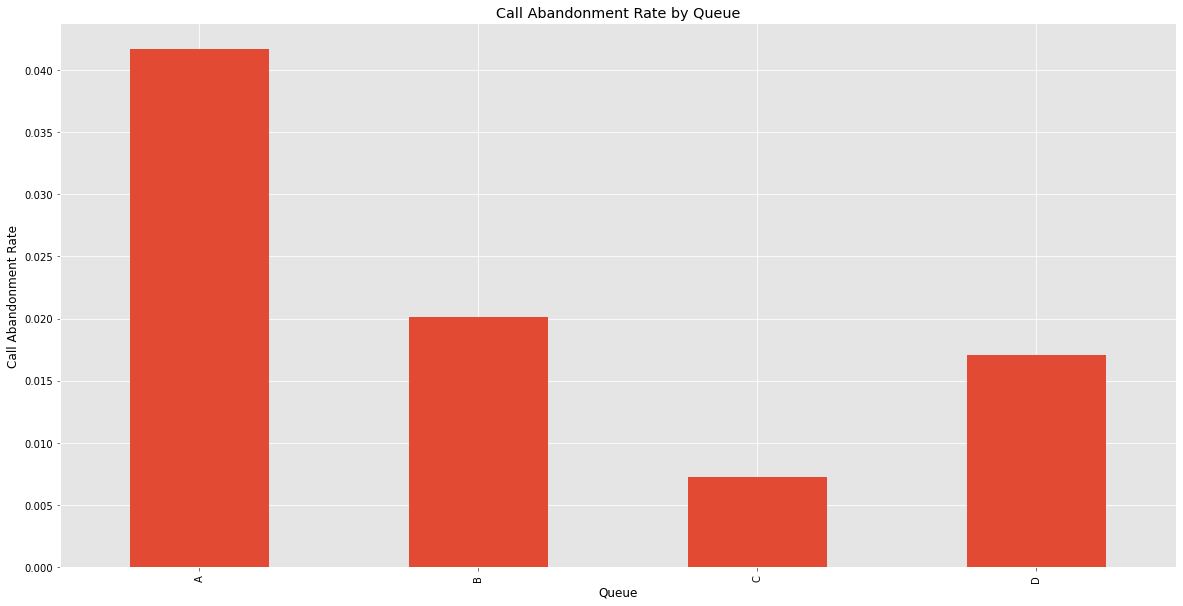

In [236]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    
abandon_df = pd.DataFrame.from_dict(abandonment_rates, orient='index')
abandon_df.rename(columns = {0:'Abandonment Rate'}, inplace = True)

fig1 = abandon_df.plot(kind = 'bar', legend = False)
plt.title('Call Abandonment Rate by Queue',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Queue',color = 'black')
plt.ylabel('Call Abandonment Rate',color = 'black')


In [237]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

all_plt = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df[df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = df[df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100 

all_plt
# service_level

,Incoming Wait Time
Rep ID,
Alice,2.500000
Amanda,2.400000
Andy,3.600000
Brent,2.125000
Cam,2.909091
Duke,2.785714
Eric,2.611111
George,3.153846
Helga,3.272727


<AxesSubplot:title={'center':'Call Answer Performance by Sales Rep'}, xlabel='Incoming Wait Time', ylabel='Sales Rep'>

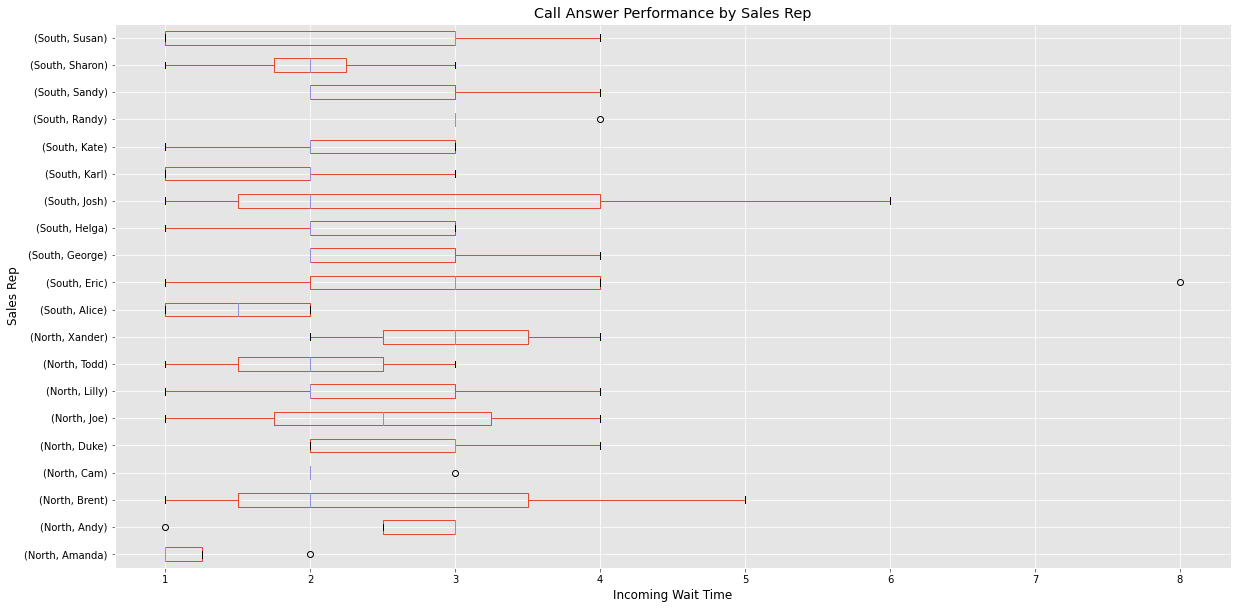

In [238]:
box_df = df.pivot_table(values='Calls', index=['Incoming Wait Time'],
                    columns=['Branch', 'Rep ID'], aggfunc='sum')

box_df
fig2 = box_df.plot(kind = 'box', vert = False)
plt.title("Call Answer Performance by Sales Rep")
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Incoming Wait Time',color = 'black')
plt.ylabel('Sales Rep',color = 'black')

fig2

Text(0, 0.5, 'Rep ID')

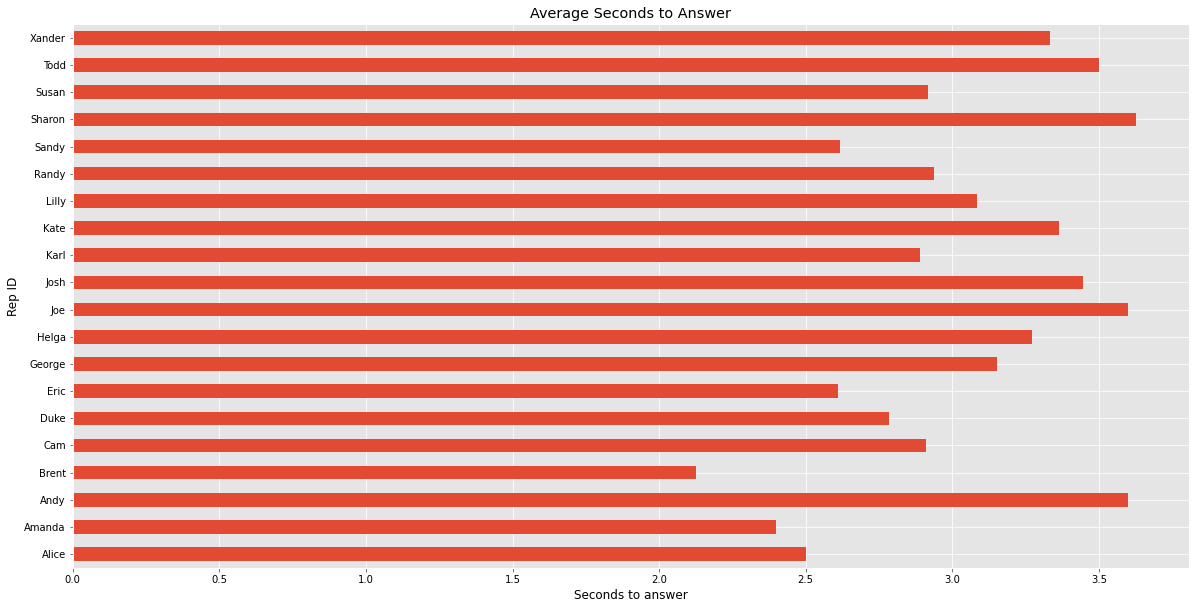

In [239]:
fig3 = all_plt.plot(kind = 'barh', legend = False) # Average seconds to answer
plt.title("Average Seconds to Answer")
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Seconds to answer',color = 'black')
plt.ylabel('Rep ID',color = 'black')


Text(0, 0.5, 'Rep ID')

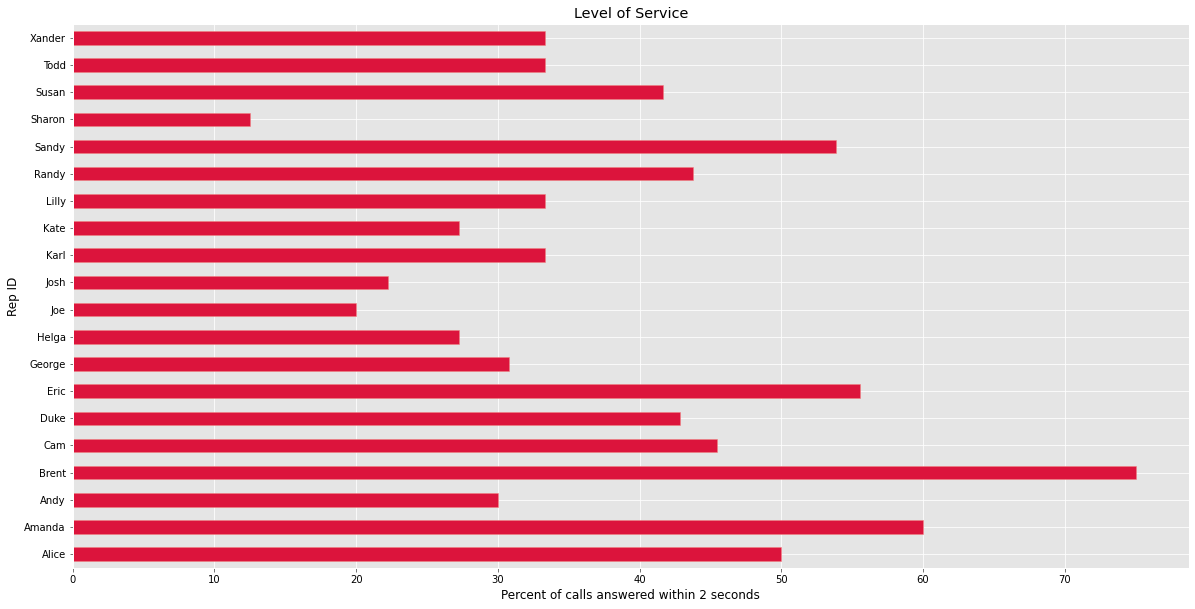

In [231]:
service_level_just_pct = service_level.drop(['Calls_x','Calls_y'], axis=1)
service_level_just_pct.plot.barh(legend = False, color = 'crimson', edgecolor = 'lightcoral') 
plt.title("Level of Service")
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Percent of calls answered within 2 seconds',color = 'black')
plt.ylabel('Rep ID',color = 'black')
# Service Level (Percent of calls answered within 2 seconds)

Text(0, 0.5, 'Call Purpose')

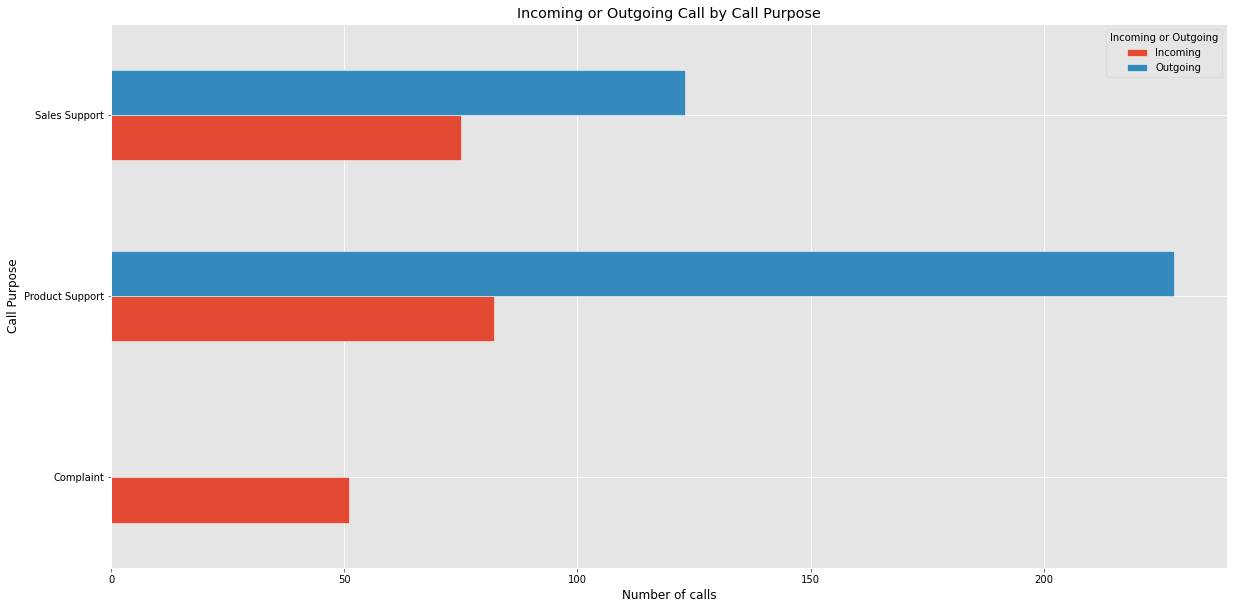

In [240]:
# Create visualization 3 here
# Couldn't get provided code to run. Used pivot table instead

purpose_group = df.pivot_table(values='Calls', index=['Call Purpose'],
                    columns=['Incoming or Outgoing'], aggfunc='sum')

purpose_group.plot.barh(edgecolor = 'white')
plt.title("Incoming or Outgoing Call by Call Purpose")
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Number of calls',color = 'black')
plt.ylabel('Call Purpose',color = 'black')


### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

For visualization 1 (average abandonment rate per queue) I chose a bar chart as it easily allows for comparison between categorical varaibles. For visualization 2 I approached this in two ways - one bar chart for each variable (average answer time and service level) allowed for more granular comparison between the variables (especially in service level), but for a more holistic picture of each sales rep's performance, I thought it would be useful to use a box plot - that way, it's easy to compare everyone's average call answer time as well as whether most of their calls were under 2 minutes - however, this chart does not show variables as exactly as a bar chart. If there were more time I would color code the rep's bars/boxes in these charts by their branch affiliation but I was not able to figure this out! Finally, for visualization 3, I used a grouped bar chart because it was a good way to visually compare two categorical variables.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why? 

It didn't seem like there was a huge different between the two branches. Call abandonment rate was the only variable where it seemed like one branch was substantially worse off, which was the north branch. But busy minutes, not ready minutes, incoming wait time, and during call wait time were nearly identical between the two branches.

2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
I guess the north branch would because there are nine reps versus the south branch's eleven reps and the north branch has a higher call abandonment rate, but it was not totally clear from the data that either branch was significantly outperforming the other.

3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

I don't feel like I can draw any real conclusions from this data set because I'm not sure there was enough data provided to do so! This data set only contained data for maybe 10 calls per rep - maybe this is only one day's worth of calls? I don't feel like it is possible to draw broad conclusions based on such a small amount of data. It would be better to analyze at least a month's worth of calls, and ideally a year's worth to factor in seasonality, before making recommendations. Because of this I don't think I can make any meaningful recommendations.

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [234]:
# Create your visualization here!


# Use groupby to plot based on time blocks:

# call_pivot = call_times.pivot_table(values='Calls', index=['Time Block'],
                    # columns=['Call Purpose'], aggfunc='sum')

    
# Use groupby and get_group to select which call purpose to plot:
